In [22]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap

digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

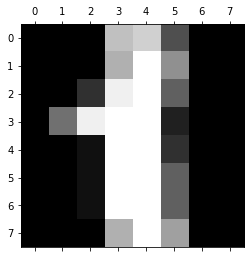

In [2]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])
# plt.savefig("1.jpg")

In [3]:
import numpy as np
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(digits.data/255)

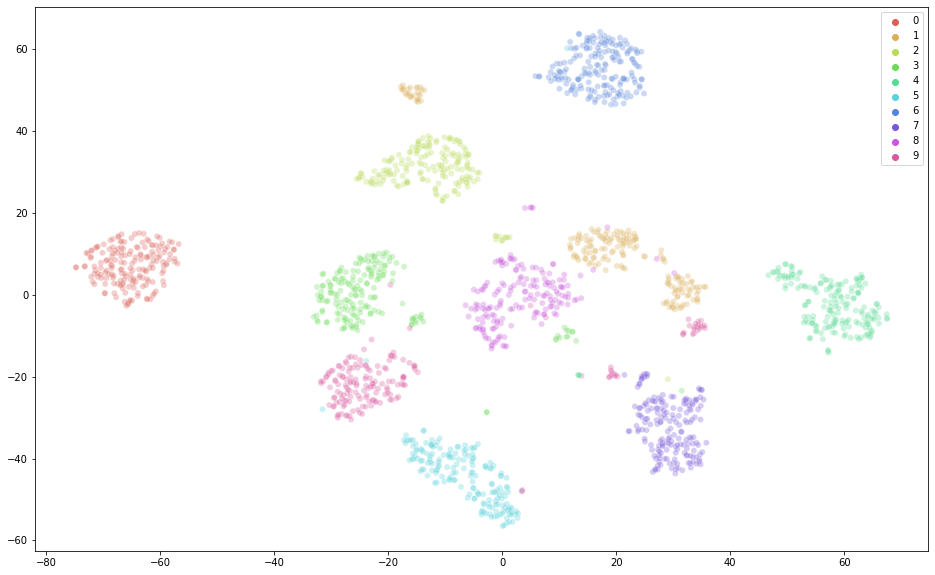

In [4]:
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=X_embedded[:,0], y=X_embedded[:,1],
    hue=digits.target,
    palette=sns.color_palette("hls", 10),
    data=digits.data,
    legend="full",
    alpha=0.3
)

In [5]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=3).fit(digits.data/255)

In [6]:
print(f"Explained Variance: {X_pca.explained_variance_ratio_}")
print(f"Explained Variance Ratio: {X_pca.explained_variance_}")
      
X_pca = X_pca.fit_transform(digits.data/255)

Explained Variance: [0.14890594 0.13618771 0.11794594]
Explained Variance Ratio: [0.00275289 0.00251777 0.00218052]


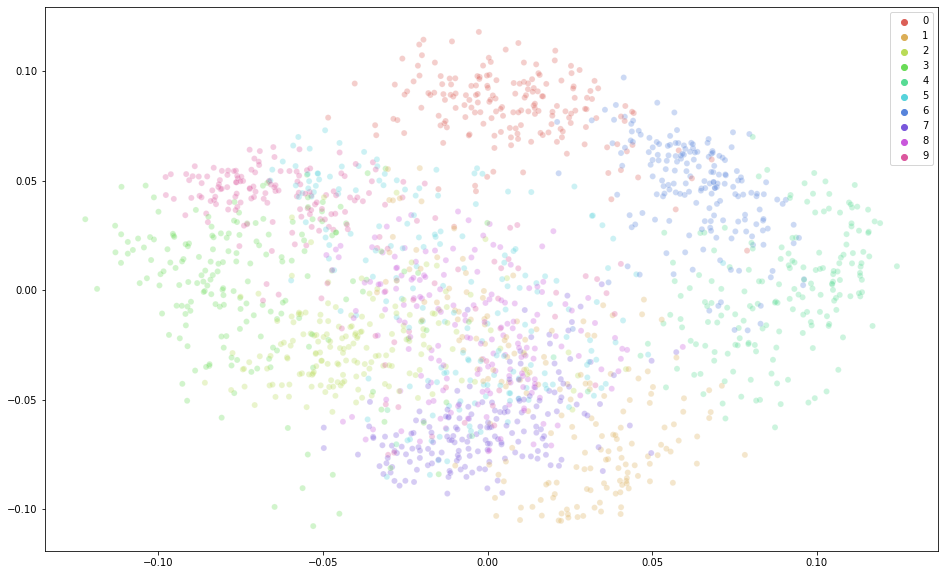

In [7]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=digits.target,
    palette=sns.color_palette("hls", 10),
    data=digits.data,
    legend="full",
    alpha=0.3
)

In [25]:
%%time
z1 = umap.UMAP(init='random',random_state=42)
z1.fit(digits.data)

CPU times: user 4.52 s, sys: 25.6 ms, total: 4.55 s
Wall time: 4.28 s


UMAP(dens_frac=0.0, dens_lambda=0.0, init='random', random_state=42)

In [23]:
%%time
z2 = umap.UMAP()
z2.fit(digits.data)

CPU times: user 14.2 s, sys: 668 ms, total: 14.9 s
Wall time: 4.46 s


UMAP(dens_frac=0.0, dens_lambda=0.0)

In [26]:
X_umap = z1.transform(digits.data)
z2_umap = z2.transform(digits.data)
plt.figure(figsize=(16,10))

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

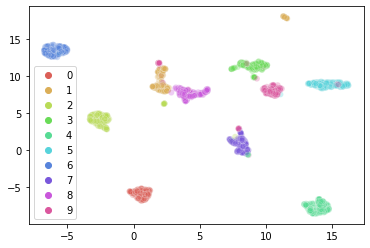

In [27]:
sns.scatterplot(
    x=X_umap[:,0], y=X_umap[:,1],
    hue=digits.target,
    palette=sns.color_palette("hls", 10),
    data=digits.data,
    legend="full",
    alpha=0.3
)

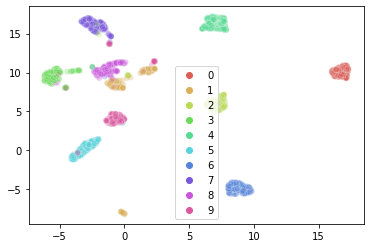

In [11]:
sns.scatterplot(
    x=z2_umap[:,0], y=z2_umap[:,1],
    hue=digits.target,
    palette=sns.color_palette("hls", 10),
    data=digits.data,
    legend="full",
    alpha=0.3
)

In [28]:
from openTSNE import TSNE
%time X_tsne_PCA = TSNE(n_jobs=-1, negative_gradient_method='bh').fit(digits.data/255)

CPU times: user 7.54 s, sys: 1.02 s, total: 8.56 s
Wall time: 6.6 s


In [31]:
%time X_random_init = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(digits.data/255)

CPU times: user 6.5 s, sys: 57.4 ms, total: 6.55 s
Wall time: 6.06 s


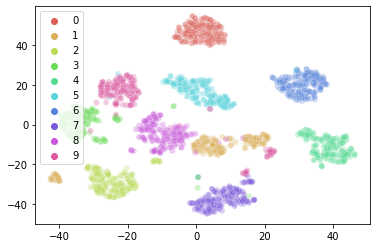

In [32]:
sns.scatterplot(
    x=X_tsne_PCA[:,0], y=X_tsne_PCA[:,1],
    hue=digits.target,
    palette=sns.color_palette("hls", 10),
    data=digits.data,
    legend="full",
    alpha=0.3
)

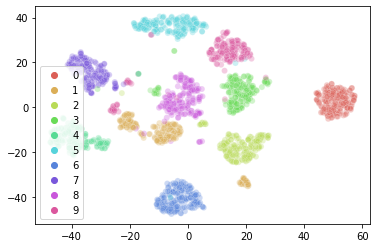

In [33]:
sns.scatterplot(
    x=X_random_init[:,0], y=X_random_init[:,1],
    hue=digits.target,
    palette=sns.color_palette("hls", 10),
    data=digits.data,
    legend="full",
    alpha=0.3
)